# Создание своего пакета

https://pythonhosted.org/an_example_pypi_project/setuptools.html

Если мы хотим, чтобы наш код был доступен в виде подключаемой библиотеки, нам нужно собрать его в whl-пакет. С этим прекрасно справляется библиотека setuptools. Чтобы собрать пакет, нам нужно заложить в него определенную структуру

## Структура пакета

    some_root_dir/
    |-- venv
    |   |-- bin
    |   |-- lib
    |   |-- ....
    |
    |-- README
    |-- setup.py
    |-- an_example_pypi_project
    |   |-- __init__.py
    |   |-- __main__.py
    |   |-- useful_1.py
    |   |-- useful_2.py
    |
    |-- tests
    |-- |-- __init__.py
    |-- |-- runall.py
    |-- |-- test0.py
    
Требования библиотеки следующие:

- в корне должен быть файл setup.py, в котором прописан скрипт сборки проекта
- и папка с исходниками (в ее корне - точка входа в проект - файл \_\_init\_\_.py)
- в папке с исходниками могут быть два интересных файла: \_\_init\_\_.py и \_\_main\_\_.py. Первый выполнится в любом случае при импорте библиотеки. Второй выполнится тогда, когда мы ее запускаем как модуль с помощью синтаксиса `python -m our_module`

Также принято делать так:

- в корне проекта помещать еще и тесты. Для production-релиза их не нужно включать в релиз, но в версии, которую могут дорабатывать другие разработчики, они необходимы. Потому они лежат рядом с исходниками, а не где-то внутри
- чаще всего разработка каждого проекта проходит в отдельной виртуальной среде. Папку со средой тоже принято хранить рядом с папкой с исходниками.

## setup.py

Простейший вариант скрипта в файле setup.py выглядит так:

In [ ]:
from setuptools import setup, find_packages


setup(
    name="HelloWorld",
    version="0.1",
    packages=find_packages(),
)

Этого достаточно для того, чтобы выполнить из консоли команду `python setup.py sdist` и получить пакет (но пока не wheel).

Что еще можно поместить в команду setup?

In [ ]:
from setuptools import setup, find_packages


setup(
    name="HelloWorld",
    version="0.1",
    packages=find_packages(),
    scripts=["say_hello.py"],

    # Project uses reStructuredText, so ensure that the docutils get
    # installed or upgraded on the target machine
    install_requires=["docutils>=0.3"],

    package_data={
        # If any package contains *.txt or *.rst files, include them:
        "": ["*.txt", "*.rst"],
        # And include any *.msg files found in the "hello" package, too:
        "hello": ["*.msg"],
    },

    # metadata to display on PyPI
    author="Me",
    author_email="me@example.com",
    description="This is an Example Package",
    keywords="hello world example examples",
    url="http://example.com/HelloWorld/",   # project home page, if any
    project_urls={
        "Bug Tracker": "https://bugs.example.com/HelloWorld/",
        "Documentation": "https://docs.example.com/HelloWorld/",
        "Source Code": "https://code.example.com/HelloWorld/",
    },
    classifiers=[
        "License :: OSI Approved :: Python Software Foundation License"
    ]

    # could also include long_description, download_url, etc.
)

### Некоторые интересные аргументы функции setup

- `scipts` - скрипты, которые нужно включить в пакет
- `packages` - модули в проекте
- `package_data` - файлы, не являющиеся скриптами, но содержащие нечто важное для проекта
- `install_requires` - список библиотек, которые должны быть установлены для возможности использования пакета
- `setup_requires` - список библиотек, которые нужны для сборки пакета
- `python_requires` - версия питона, в которой можно использовать модуль
- `entry_points` - возможные точки входа в приложение. Позволяют создать команды терминала, по вызову которых в виртуальном окружении с установленным пакетом будут исполняться указанные функции из пакета. Пример - pip. Выглядит так:

In [ ]:
setup(
    # other arguments here...
    entry_points={
        "console_scripts": [
            "foo = my_package.some_module:main_func",
            "bar = other_module:some_func",
        ],
        "gui_scripts": [
            "baz = my_package_gui:start_func",
        ]
    }
)

## Создание whl-пакета

    python setup.py sdist bdist_wheel
    
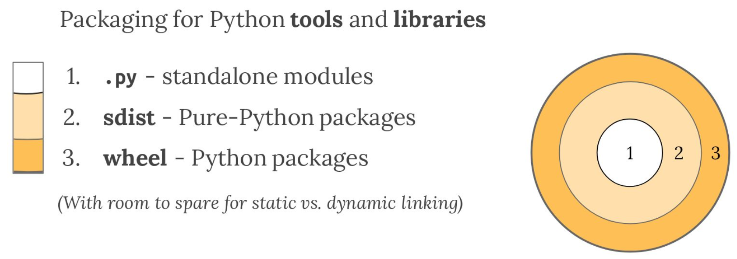

После этой команды появляется папка dist, в которой будет архив с собранным пакетом.

## Загрузка пакета в pypi-репозиторий

Для этого предназначена библиотека `twine`:

    pip install twine
    twine upload dist/*
    
    
## Альтернативный pypi-сервер

Специально для нашего курса в сети учебного центра поднят свой pypi-сервер. Использовать альтернативный сервер в twine можно так:

    twine upload --repository-url https://наш_сервер dist/*
    
Устанавливать пакеты с помощью pip оттуда можно так:

    pip install --extra-index-url https://наш_сервер our_package